In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv("twitter_training.csv")
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
data.columns = ['ID', 'Topic', 'Sentiment', 'Text']
data = data.drop(columns=['ID'])
data.head()

,Topic,Sentiment,Text
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


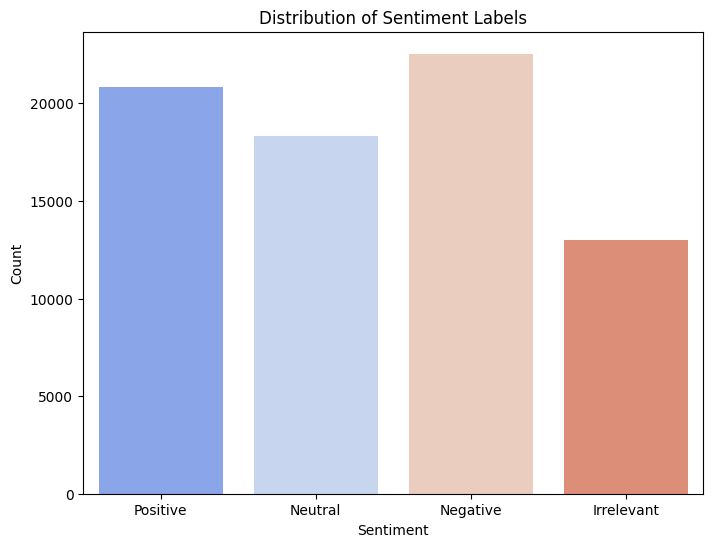

In [4]:
# here we plot the graph for Distribuiton of sentiment labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data, palette='coolwarm' , hue = 'Sentiment' , legend = False)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [49]:
x = data['Text']
y = data['Sentiment']

data['Text'] = data['Text'].str.lower()

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=0)

In [50]:
X_train = X_train.fillna('')  
X_test = X_test.fillna('') 

In [51]:
print(data['Text'].isna().sum())

#data = data.dropna(subset=['Text'])
data['Text'] = data['Text'].fillna('')

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

0


In [52]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [53]:
y_pred = model.predict(X_test_vec)

In [54]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.89      0.78      0.83      2569
    Negative       0.85      0.87      0.86      4502
     Neutral       0.88      0.79      0.83      3658
    Positive       0.78      0.89      0.83      4208

    accuracy                           0.84     14937
   macro avg       0.85      0.83      0.84     14937
weighted avg       0.84      0.84      0.84     14937



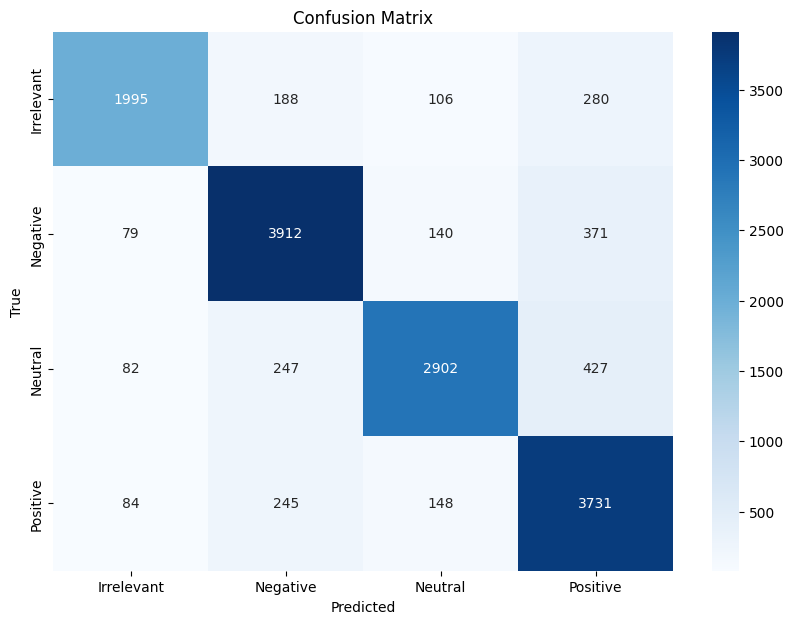

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()